$y(n + 1) = y(n) -by(n) + \cfrac{cy(n-\tau)}{1+ y^{10} (n- \tau)}$, which is only defined for $n >= 18$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPRegressor

In [2]:
y_list = [0.9697, 0.9699, 0.9794, 1.0003, 1.0319, 1.0703, 1.1076, 1.1352, 1.1485, 1.1482, 1.1383, 1.1234, 1.1072, 1.0928, 1.0820, 1.0756, 1.0739, 1.0759]

In [3]:
# Maoussi Akapo S18's solution
def MackayGlass_1(y, N):
    b = 0.1
    c = 0.2
    tau = 17
    for n in range(17, N):
        y = np.append(y, (y[n] - b*y[n] + (c*y[n-tau]/(1 + ((y[n-tau])**10)))))
        
    return(y)

In [4]:
import time
time1 = time.time()*1000
Y_from_list = MackayGlass_1(y_list, 699)
time2 = time.time()*1000
print(time2-time1)
type(Y_from_list)
Y_from_list[:20]

7.496337890625


array([0.9697    , 0.9699    , 0.9794    , 1.0003    , 1.0319    ,
       1.0703    , 1.1076    , 1.1352    , 1.1485    , 1.1482    ,
       1.1383    , 1.1234    , 1.1072    , 1.0928    , 1.082     ,
       1.0756    , 1.0739    , 1.0759    , 1.08008154, 1.08377027])

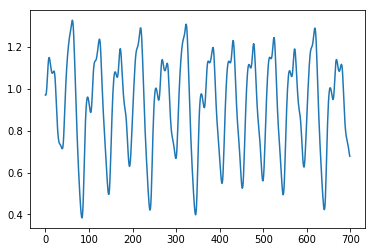

In [5]:
plt.plot(range(700),Y_from_list)
plt.show()

In [6]:
Y = Y_from_list
print(Y.shape)
type(Y)
Y

(700,)


array([0.9697    , 0.9699    , 0.9794    , 1.0003    , 1.0319    ,
       1.0703    , 1.1076    , 1.1352    , 1.1485    , 1.1482    ,
       1.1383    , 1.1234    , 1.1072    , 1.0928    , 1.082     ,
       1.0756    , 1.0739    , 1.0759    , 1.08008154, 1.08377027,
       1.08348978, 1.07502078, 1.05463879, 1.02118416, 0.97769029,
       0.92977576, 0.88280169, 0.84060916, 0.8054831 , 0.77841181,
       0.75932979, 0.74713766, 0.74006496, 0.73607165, 0.7331149 ,
       0.72970445, 0.72508158, 0.71956612, 0.7147047 , 0.71346421,
       0.72017254, 0.73960924, 0.77440028, 0.82236696, 0.87726495,
       0.93247808, 0.98371613, 1.0292715 , 1.06911252, 1.10394611,
       1.13461256, 1.16179913, 1.18594902, 1.20730476, 1.22599067,
       1.24214138, 1.25606447, 1.26843534, 1.28041639, 1.29338962,
       1.30778243, 1.32109362, 1.32714   , 1.31900272, 1.29353125,
       1.25235953, 1.19958377, 1.13948735, 1.07556889, 1.01041084,
       0.94583935, 0.88311403, 0.82307945, 0.76626701, 0.71295

In [8]:
Y_train0 =  Y[0:300].reshape(-1,1)
Y_test0 = Y[301:700].reshape(-1,1)
print(Y_train0.shape)
print(Y_test0.shape)
#Y_train # stops at 0.66848135]
#Y_test #starts at 0.68061062

(300, 1)
(399, 1)


In [9]:

#the serie is recursively defined. We are going to try to predict the next value after the end of X_train. This value is in Y_test[0]
X_train0 = np.arange(0, 300, 1).reshape(-1, 1)
X_test0 = Y_test0[0].reshape(1, -1)

print(X_train0.shape)
print(X_test0.shape)

print(X_test0.item(0,0))

(300, 1)
(1, 1)
0.6806106168083967


In [9]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

### Predict recursively from seasonality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


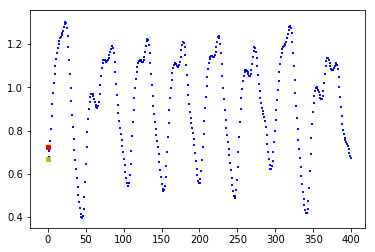

In [10]:
#Now the model is tuned we can define value of Y at point n+1 from value at point n.


MLP01 = MLPRegressor(
    hidden_layer_sizes=(9), activation='tanh', solver='adam', alpha=0.1, batch_size=141,
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=1, tol=0.00001, verbose=False, warm_start=True, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.960, beta_2=0.9969, epsilon=1e-9)

MLP_model01 = MLP01.fit(X_train0, Y_train0)
#test_x = X_test
pred_y01 = MLP_model01.predict(X_test0)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(range(399), Y_test0, s=1, c='b', marker="s", label='real')
ax1.scatter(range(1), Y_train0[299], s=20, c='y', marker="s", label='x at time n')
ax1.scatter(range(1), pred_y01, s=20, c='r', marker="s", label='NN Prediction for x at time n + 1')
plt.show()
#lucky layers for tanh + adam
#9

In [11]:
#we define a function (same trick as before) to iterate on the result of the regressor from value at point n.
def iter_on_pred (y, n):
    for n in range(0, n):
        y = np.append(y, MLP_model01.predict(y)[n]).reshape(-1,1)
    return(y)

In [12]:
#now we can predict the first n+1 values of the time series from the regressor, feeding him with enough initial values.
#we cannot predict a whole serie from one point:
foreC = iter_on_pred(X_test0, 399)
foreC

#we have to feed the regressor with at least one season to be accurate, if not the prediction will never go down
#try to predict the next 300 values after the 100 values in Y[301:401]. the output will be a 400 values array,
#containing  Y[301:401] + 300 prediction points.
newX = Y[301:401].reshape(-1,1)
print(newX.shape)
foreL = iter_on_pred(newX, 300)
foreL.shape

(100, 1)


(400, 1)

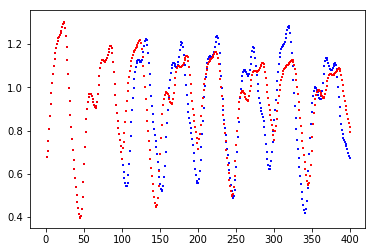

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(range(399), Y_test0, s=1, c='b', marker="s", label='real x')
ax1.scatter(range(400), foreL, s=1, c='r', marker="s", label='prediction from first season')
plt.show()


### PB: with this method we must be sure the serie is seasonal

### Predict from lags: recreate X and Y

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

class InsertLags(BaseEstimator, TransformerMixin):
    """
    Automatically Insert Lags
    """
    def __init__(self, lags):
        self.lags = lags

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        original_cols=list(range(len(X[0,:])))
        for lag in self.lags:
            X_lagged=pd.DataFrame(X[:,original_cols]).shift(lag).values
            X=np.concatenate((X,X_lagged), axis=1)
        return X

In [11]:
#define generic train /test sets
train = Y[0:300].reshape(300,1)
test =  Y[301:700].reshape(399,1)
test.shape
train.shape

(300, 1)

In [13]:
################################################## MAKE X AND Y LAGS LARGER ############################################################

L = list(range(200))
add_lags=InsertLags(L)

#######################                        WARNING : IS UPSIDE DOWN : INVERSED WITH TRANSPOSE OF X_TEST               ####################################


####################            Chekc scikit arrays Input : n_samples*n_features order       ############################

################################################# start test ############################################################
#testeR=np.array([[1,3,5,7,9],
#      [2,4,6,8,10]]).T
#print(testeR)
################################################# end test ###############################################################


Y_train2 =add_lags.fit_transform(train)
##
#make Y from X with same lagged dimensions
X_train2 = np.arange(0,(np.size(Y_train2,0)),1).reshape(-1,1)   # from 0 to 119
X_train2 = add_lags.fit_transform(X_train2)

##
#supress nan in X and Y
X_train2 = X_train2[~np.isnan(X_train2).any(axis=1)]
Y_train2 = Y_train2[~np.isnan(Y_train2).any(axis=1)]

##
#flip the lags
X_train2 = np.fliplr(X_train2)
Y_train2 = np.fliplr(Y_train2)


print('X_train2' , X_train2.shape)
print('  ')
print("Y_train2", Y_train2.shape)


Y_test2 = test
X_test2 = np.arange(train.shape[0], (train.shape[0] + len(L))+1,1).reshape(-1, 1)
X_test2 = X_test2.T

print("X_test2", X_test2.shape)
print("Y_test2", Y_test2.shape)


print('X_train2  ')  
print(X_train2)


print('  ')
print(' X_test2 ')  
print(X_test2)


print('  ')
print('Y_train2:  ') 
print(Y_train2)
print('  ')
print("train[last_index]", train[299])


print('  ')
print("test[first_index]", test[0])


print('  ')
print('Y_test2:  ')  
print(Y_test2)


X_train2 (101, 201)
  
Y_train2 (101, 201)
X_test2 (1, 201)
Y_test2 (399, 1)
X_train2  
[[  0.   1.   2. ... 198. 199. 199.]
 [  1.   2.   3. ... 199. 200. 200.]
 [  2.   3.   4. ... 200. 201. 201.]
 ...
 [ 98.  99. 100. ... 296. 297. 297.]
 [ 99. 100. 101. ... 297. 298. 298.]
 [100. 101. 102. ... 298. 299. 299.]]
  
 X_test2 
[[300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317
  318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335
  336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353
  354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371
  372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389
  390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407
  408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425
  426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443
  444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461
  462

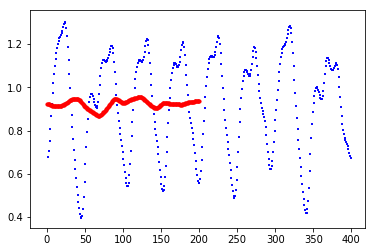

In [34]:
MLP02 = MLPRegressor(
    hidden_layer_sizes=(3,), activation='logistic', solver= 'lbfgs', alpha=0.001, batch_size=8,
    learning_rate='invscaling', learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=0, tol=0.00001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.99, beta_2=0.99, epsilon=1e-9)


MLP_model_02 = MLP02.fit(X_train2, Y_train2)
Y_pred2 = MLP_model_02.predict(X_test2)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(range(Y_test2.size), Y_test2, s=1, c='b', marker="s", label='real')
ax1.scatter(range(Y_pred2.size), Y_pred2, s=10, c='r', marker="o", label='NN Prediction')
plt.show()

### PB : with this method we cannot lag the entire test set, as we will have more and more empty cells to suppress. 

In [14]:
Y_train3 = Y[0:300].reshape(-1,1).T
Y_test3 = Y[301:700].reshape(-1,1).T

X_train3 = np.arange(0, (Y_train3.shape[1]),1).reshape(-1, 1)
X_test3 = np.arange(Y_train3.shape[1], (Y.shape[0]-(Y_test3.shape[1]- Y_train3.shape[1])-1),1).reshape(-1, 1)
X_train3 = X_train3.T
X_test3 = X_test3.T


print('X_train3' , X_train3.shape)
print('  ')
print("Y_train3", Y_train3.shape)
print('  ')
print("X_test3", X_test3.shape)
print('  ')
print("Y_test3", Y_test3.shape)



print('  ')
print('X_train3  ')  
print(X_train3)

print('  ')
print(' X_test3 ')  
print(X_test3)


print('  ')
print('Y_train3:  ') 
print(Y_train3)
print('  ')
print("train[last_index]", train[299])



print('  ')
print("test[first_index]", test[0])

print('  ')
print('Y_test3:  ')  
print(Y_test3)



X_train3 (1, 300)
  
Y_train3 (1, 300)
  
X_test3 (1, 300)
  
Y_test3 (1, 399)
  
X_train3  
[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
   36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
   54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
   72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
   90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
  108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
  126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
  144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
  162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
  180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
  198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
  216 217 218 219 2

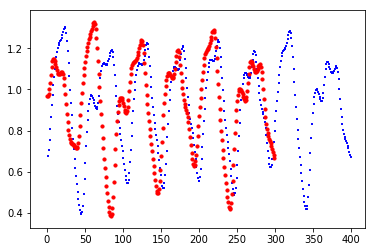

In [36]:
MLP03 = MLPRegressor(
    hidden_layer_sizes=(24,), activation='tanh', solver= 'adam', alpha=1, batch_size=1,
    learning_rate='invscaling', learning_rate_init=0.001, power_t=0.5, max_iter=10000, shuffle=True,
    random_state=0, tol=0.00001, verbose=False, warm_start=True, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.99, beta_2=0.99, epsilon=1e-9)


MLP_model_03 = MLP03.fit(X_train3, Y_train3)
Y_pred3 = MLP_model_03.predict(X_test3)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(range(Y_test3.size), Y_test3, s=1, c='b', marker="s", label='real')
ax1.scatter(range(Y_pred3.size), Y_pred3, s=10, c='r', marker="o", label='NN Prediction')
plt.show()

#### or from the last 300 Y on test set, with a gap of 100 points we would try to get the weigths from Regressor argument 'warm_start  =True'

In [15]:
Y_train4 = Y[0:300].reshape(-1,1).T
Y_test4 = Y[400:700].reshape(-1,1).T

X_train4 = np.arange(0, (Y_train4.shape[1]),1).reshape(-1, 1)
X_test4 = np.arange(Y_test4.shape[1]+100, (Y.shape[0]),1).reshape(-1, 1)
X_train4 = X_train4.T
X_test4 = X_test4.T


print('X_train4' , X_train4.shape)
print('  ')
print("Y_train4", Y_train4.shape)
print('  ')
print("X_test4", X_test4.shape)
print('  ')
print("Y_test4", Y_test4.shape)



print('  ')
print('X_train4  ')  
print(X_train4)

print('  ')
print(' X_test4 ')  
print(X_test4)


print('  ')
print('Y_train4:  ') 
print(Y_train4)
print('  ')
print("train[last_index]", train[299])



print('  ')
print("test[first_index+100]", test[99])

print('  ')
print('Y_test4:  ')  
print(Y_test4)



X_train4 (1, 300)
  
Y_train4 (1, 300)
  
X_test4 (1, 300)
  
Y_test4 (1, 300)
  
X_train4  
[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
   36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
   54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
   72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
   90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
  108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
  126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
  144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
  162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
  180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
  198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
  216 217 218 219 2

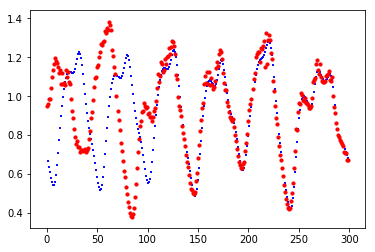

In [38]:
MLP_model_03 = MLP03.fit(X_train4, Y_train4)
Y_pred4 = MLP_model_03.predict(X_test4)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(range(Y_test4.size), Y_test4, s=1, c='b', marker="s", label='real')
ax1.scatter(range(Y_pred3.size), Y_pred4, s=10, c='r', marker="o", label='NN Prediction')
plt.show()

###### We can try a grid search to find the optimal parameters of the regressor on non transposed arrays
                                                 #  #   DISCLAIMER   #  # 
                                   RUNNING A GRID SEARCH ON NOTEBOOKS IS NOT RECOMMENDED
                                   
                                  
                          If you have the resource (nb of cores + RAM) you can make lists of parameters and try them together

In [39]:
from sklearn.model_selection import GridSearchCV
import timeit
mlp = MLPRegressor()
param_grid = {'hidden_layer_sizes': [i for i in range(1,50)],
              'activation': ['logistic'],
              'solver': ['lbfgs'],
              'alpha': [0.01],
              'max_iter': [10000],
              'random_state': [1],
              'early_stopping': [False],
              'warm_start': [True]}
MLP_GS = GridSearchCV(mlp, param_grid=param_grid,
                   verbose=True, pre_dispatch='2*n_jobs')


In [40]:
MLP_GS.fit(X_train2, Y_train2)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=1)]: Done 147 out of 147 | elapsed:    5.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'activation': ['logistic'], 'solver': ['lbfgs'], 'alpha': [0.01], 'max_iter': [10000], 'random_state': [1], 'early_stopping': [False], 'warm_start': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
   

In [41]:
MLP_GS.best_params_

{'activation': 'logistic',
 'alpha': 0.01,
 'early_stopping': False,
 'hidden_layer_sizes': 26,
 'max_iter': 10000,
 'random_state': 1,
 'solver': 'lbfgs',
 'warm_start': True}

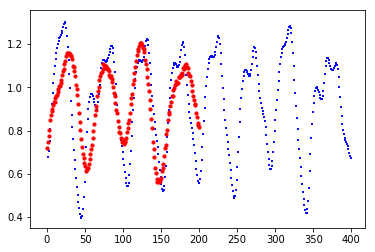

In [42]:
optimised_MLP = MLP_GS.best_estimator_

optimised_MLP_instance = optimised_MLP.fit(X_train2, Y_train2)
Y_pred2 = optimised_MLP_instance.predict(X_test2)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(range(Y_test2.size), Y_test2, s=1, c='b', marker="s", label='real')
ax1.scatter(range(Y_pred2.size), Y_pred2, s=10, c='r', marker="o", label='NN Prediction')
plt.show()